In [4]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


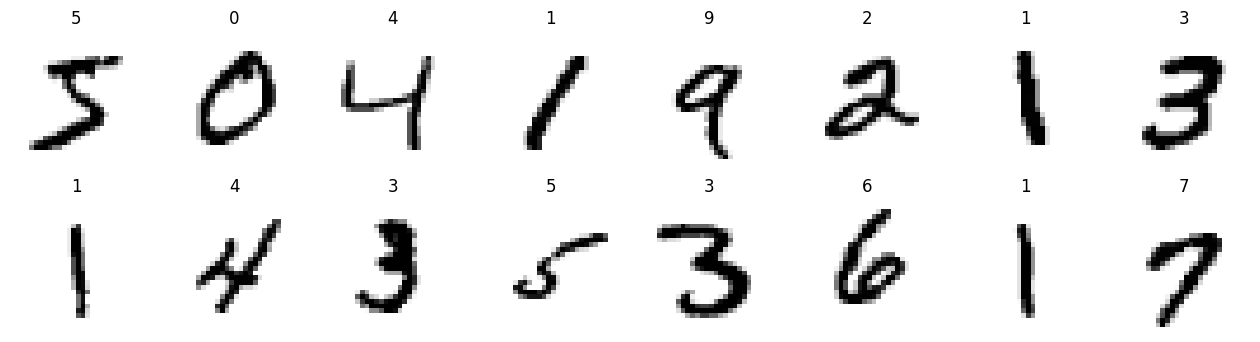

In [7]:
linhas  = 2
colunas = 8

fig, axs = plt.subplots(linhas, colunas, figsize=(16, 4))
axs      = axs.flatten()

for i in range(linhas * colunas):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
modelo_1 = tf.keras.models.Sequential()
modelo_1.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
modelo_1.add(tf.keras.layers.Dense(10, activation='softmax'))

/home/c-specp25-2/ra290192/Documents/mo809/.venv/lib64/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-11 10:41:03.851488: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
modelo_1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history_m1 = modelo_1.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64)

Epoch 1/10


/home/c-specp25-2/ra290192/Documents/mo809/.venv/lib64/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7643 - loss: 1.0022 - val_accuracy: 0.8629 - val_loss: 0.6041
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8636 - loss: 0.5553 - val_accuracy: 0.8842 - val_loss: 0.4766
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8779 - loss: 0.4733 - val_accuracy: 0.8911 - val_loss: 0.4251
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8848 - loss: 0.4337 - val_accuracy: 0.8963 - val_loss: 0.3969
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8900 - loss: 0.4093 - val_accuracy: 0.9001 - val_loss: 0.3778
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8934 - loss: 0.3922 - val_accuracy: 0.9028 - val_loss: 0.3642
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8961 - loss: 0.3796 - val_accuracy: 0.9041 - val_loss: 0.3537
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8984 - loss: 0.3696 - val_accuracy: 0.9061 - val_

In [12]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')

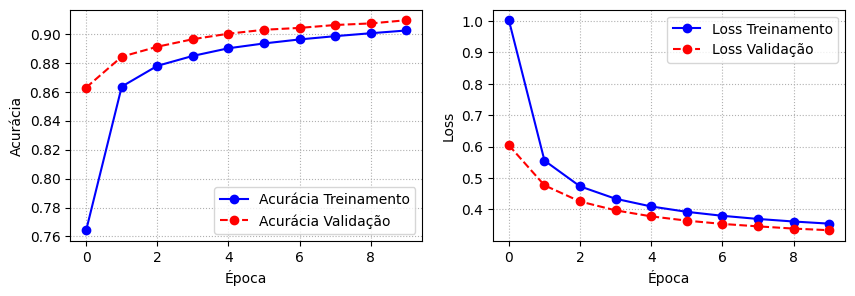

In [13]:
plot_resultados_modelo(history_m1)

In [14]:
modelo_2 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history_m2 = modelo_2.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test), batch_size=64,
                          verbose=2)

Epoch 1/10
938/938 - 9s - 10ms/step - accuracy: 0.2788 - loss: 2.2501 - val_accuracy: 0.4915 - val_loss: 2.1731
Epoch 2/10
938/938 - 8s - 8ms/step - accuracy: 0.5403 - loss: 2.0693 - val_accuracy: 0.5812 - val_loss: 1.9289
Epoch 3/10
938/938 - 8s - 8ms/step - accuracy: 0.6298 - loss: 1.7490 - val_accuracy: 0.6736 - val_loss: 1.5367
Epoch 4/10
938/938 - 8s - 8ms/step - accuracy: 0.6977 - loss: 1.3625 - val_accuracy: 0.7401 - val_loss: 1.1842
Epoch 5/10
938/938 - 8s - 8ms/step - accuracy: 0.7505 - loss: 1.0748 - val_accuracy: 0.7746 - val_loss: 0.9579
Epoch 6/10
938/938 - 8s - 8ms/step - accuracy: 0.7851 - loss: 0.8938 - val_accuracy: 0.8041 - val_loss: 0.8141
Epoch 7/10
938/938 - 8s - 8ms/step - accuracy: 0.8095 - loss: 0.7740 - val_accuracy: 0.8210 - val_loss: 0.7145
Epoch 8/10
938/938 - 8s - 8ms/step - accuracy: 0.8272 - loss: 0.6884 - val_accuracy: 0.8395 - val_loss: 0.6402
Epoch 9/10
938/938 - 8s - 8ms/step - accuracy: 0.8412 - loss: 0.6237 - val_accuracy: 0.8525 - val_loss: 0.5837


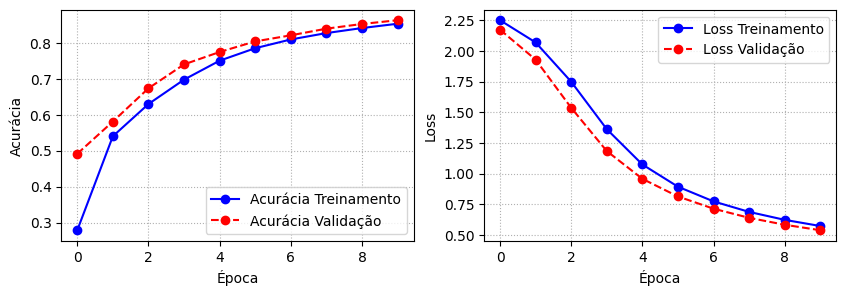

In [16]:
plot_resultados_modelo(history_m2)

In [17]:
modelo_3 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history_m3 = modelo_3.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64, verbose=2)

Epoch 1/10
938/938 - 12s - 13ms/step - accuracy: 0.9276 - loss: 0.2495 - val_accuracy: 0.9545 - val_loss: 0.1460
Epoch 2/10
938/938 - 9s - 10ms/step - accuracy: 0.9688 - loss: 0.1014 - val_accuracy: 0.9729 - val_loss: 0.0854
Epoch 3/10
938/938 - 9s - 10ms/step - accuracy: 0.9789 - loss: 0.0697 - val_accuracy: 0.9748 - val_loss: 0.0831
Epoch 4/10
938/938 - 9s - 10ms/step - accuracy: 0.9843 - loss: 0.0505 - val_accuracy: 0.9750 - val_loss: 0.0839
Epoch 5/10
938/938 - 9s - 10ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9745 - val_loss: 0.0862
Epoch 6/10
938/938 - 9s - 10ms/step - accuracy: 0.9901 - loss: 0.0305 - val_accuracy: 0.9791 - val_loss: 0.0698
Epoch 7/10
938/938 - 9s - 10ms/step - accuracy: 0.9914 - loss: 0.0258 - val_accuracy: 0.9777 - val_loss: 0.0722
Epoch 8/10
938/938 - 9s - 10ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9773 - val_loss: 0.0794
Epoch 9/10
938/938 - 9s - 10ms/step - accuracy: 0.9949 - loss: 0.0163 - val_accuracy: 0.9797 - val_loss

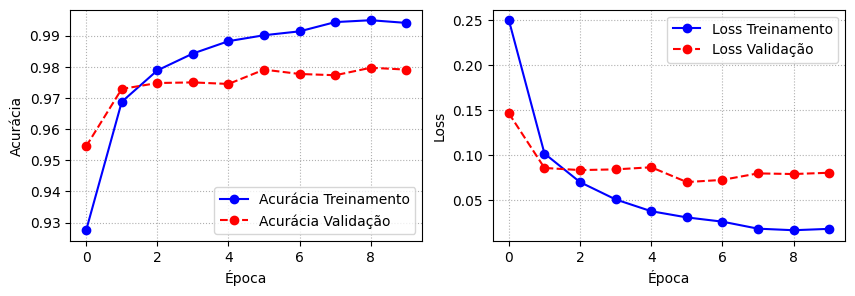

In [19]:
plot_resultados_modelo(history_m3)

In [20]:
import math
modelo_4 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [21]:
history_m4 = modelo_4.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 27s - 28ms/step - accuracy: 0.9335 - loss: 0.2131 - val_accuracy: 0.9513 - val_loss: 0.1511 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 23s - 24ms/step - accuracy: 0.9779 - loss: 0.0714 - val_accuracy: 0.9796 - val_loss: 0.0679 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 23s - 24ms/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9814 - val_loss: 0.0673 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 23s - 24ms/step - accuracy: 0.9918 - loss: 0.0250 - val_accuracy: 0.9832 - val_loss: 0.0646 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 23s - 24ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accurac

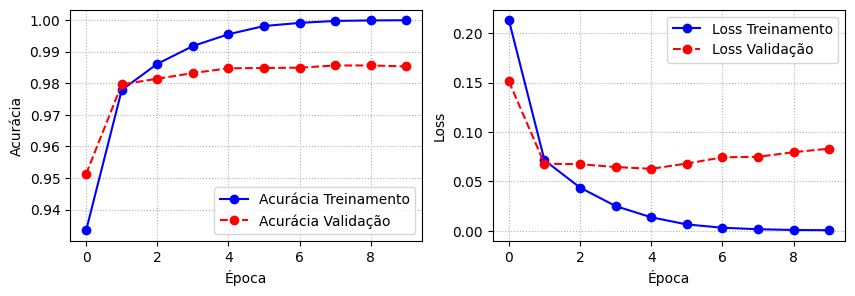

In [22]:
plot_resultados_modelo(history_m4)

In [23]:
modelo_5 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [24]:
history_m5 = modelo_5.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 27s - 28ms/step - accuracy: 0.9261 - loss: 0.2414 - val_accuracy: 0.9716 - val_loss: 0.0923 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 23s - 25ms/step - accuracy: 0.9712 - loss: 0.0973 - val_accuracy: 0.9818 - val_loss: 0.0597 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 23s - 24ms/step - accuracy: 0.9804 - loss: 0.0656 - val_accuracy: 0.9847 - val_loss: 0.0546 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 23s - 24ms/step - accuracy: 0.9862 - loss: 0.0460 - val_accuracy: 0.9879 - val_loss: 0.0404 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 23s - 25ms/step - accuracy: 0.9902 - loss: 0.0318 - val_accurac

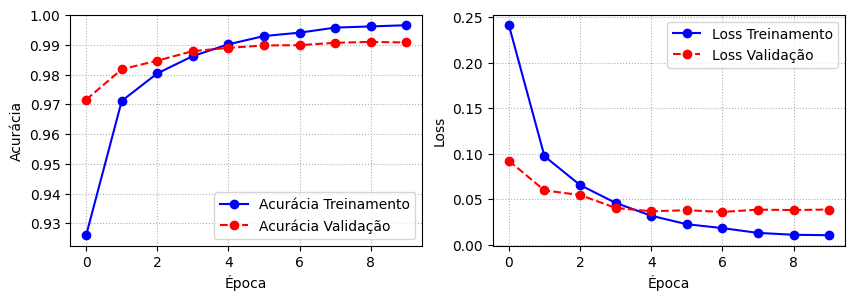

In [25]:
plot_resultados_modelo(history_m5)

In [26]:
modelo_6 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28, 28, 1)),

      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [27]:
history_m6 = modelo_6.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 43s - 46ms/step - accuracy: 0.9636 - loss: 0.1177 - val_accuracy: 0.9789 - val_loss: 0.0648 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 38s - 41ms/step - accuracy: 0.9862 - loss: 0.0446 - val_accuracy: 0.9916 - val_loss: 0.0243 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 38s - 41ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9892 - val_loss: 0.0305 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 38s - 41ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9924 - val_loss: 0.0234 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 38s - 41ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accurac

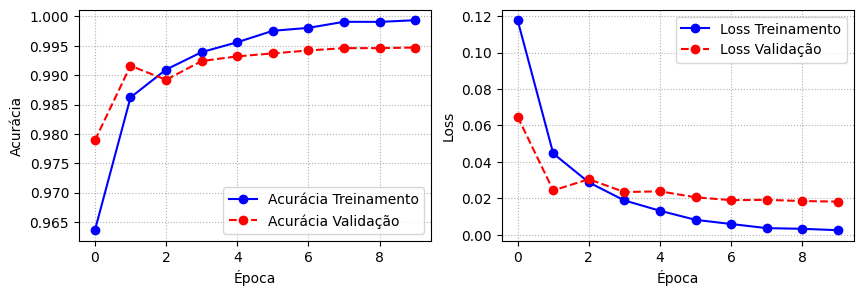

In [28]:
plot_resultados_modelo(history_m6)

In [29]:
lista_modelos = [modelo_1, modelo_2, modelo_3, modelo_4, modelo_5, modelo_6]

In [30]:
import numpy as np

lista_results = []

for modelo in lista_modelos:
  results  = modelo.predict(x_test)
  results  = np.argmax(results, axis=1)

  lista_results.append(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [33]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.1 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 51.1 MB/s  0:00:006m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [34]:
import sklearn
from sklearn.metrics import confusion_matrix

lista_cms = []

for resultado in lista_results:
  cm = confusion_matrix(
          y_test, resultado, labels=np.arange(10),
      )
  lista_cms.append(cm)

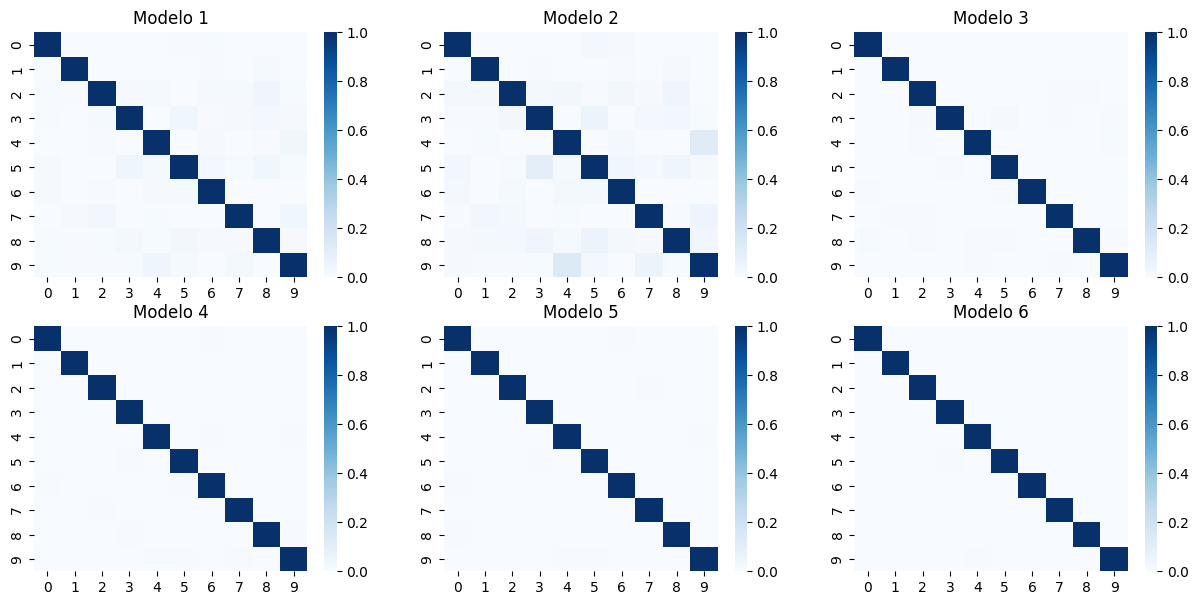

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax = ax.flatten()

for i in range(6):
  cm_norm = sklearn.preprocessing.MinMaxScaler().fit_transform(lista_cms[i])
  sns.heatmap(cm_norm, cmap='Blues', ax=ax[i]);
  ax[i].set_title(f'Modelo {i + 1}')

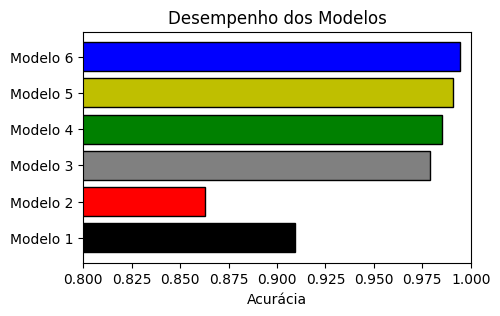

In [36]:
from sklearn.metrics import accuracy_score

lista_accs = []

fig, ax = plt.subplots(figsize=(5, 3))

for resultado in lista_results:
  acc = accuracy_score(resultado, y_test)
  lista_accs.append(acc)

ax.barh(range(6), width=lista_accs, color=['k', 'r', 'gray', 'g', 'y', 'b'], ec='k')
ax.set_yticks([0, 1, 2, 3, 4, 5], ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6']);
ax.set_xlim(0.8, 1)
ax.set_xlabel('Acurácia')
ax.set_title('Desempenho dos Modelos');

In [37]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [keras-tuner] [keras-tuner]


In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras_tuner
from keras_tuner import RandomSearch

In [39]:
# Função para criar o modelo
def constroi_modelo(hp):
    model = keras.Sequential()
    # Camada vetorização
    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    # laço para definir quantidade de camadas
    for i in range(hp.Int('num_layers', 2, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 32, 64, 128), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, 0.05)))

    model.add(layers.Dense(units=10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

    return model

In [40]:
# Define o objeto RandomSearch
tuner = RandomSearch(
    constroi_modelo,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='mnist',
    )

# Executa a pesquisa em grade
tuner.search(
    x_train,
    y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.TensorBoard("mnist2", histogram_freq=1)])

Trial 15 Complete [00h 00m 27s]
val_accuracy: 0.9460999965667725

Best val_accuracy So Far: 0.95660001039505
Total elapsed time: 00h 06m 34s


In [41]:
%reload_ext tensorboard

In [43]:
%tensorboard --logdir=mnist2

Reusing TensorBoard on port 6006 (pid 38161), started 0:01:10 ago. (Use '!kill 38161' to kill it.)